# Resumen - Iteración de Punto Fijo

## Teoría

El método de iteración de punto fijo es un método numérico que permite solucionar ecuaciones no lineales. Funciona dejando un punto en x constante y aproximarse a él a través de una funcion iterativa.

Dada la función $f(x)=0$, para resolver para x se necesita reescribir dicha función y dejarla en términos de x y despejada para x. 
De esta forma tendremos:
    
$x = g(x)$

Donde:
    
$x$ es nuestro punto fijo y $g(x)$ es nuestra función iterativa.

En términos generales este algoritmo se define como:
    
$x_{n} = g(x_{n-1})$

Vamos a repetir este procedimiento hasta llegar a un error aceptado por nuestra tolerancia.

##### Condiciones apropiadas

Decimos que:
    
Cuando $g'(x) < 1 $ va a converger y cuando $g'(x)\geq 1$ va a diverger.

## Ejemplo práctico

In [49]:
#imports
import numpy
from matplotlib import pyplot as plt
import math

In [50]:
#Definimos nuestras funciones

def g(x):
    return 5/(math.pow(math.e,0.5*x)+1.2)
    #return 1+2/x

def f(x):
    return x*math.pow(math.e, x*0.5)+1.2*x-5
    #return x**2-x-2
    
def f1(x):
    return x

def zero(x):
    return 0

In [51]:
#Definición general del algoritmo, parámetros: f, g, x inicial y tolerancia

def fixed_point(f, g, x, t):
    xn = 0
    e = 1
    i = 0
    while e > t:
        xn = g(x)
        x = xn
        e = abs(f(xn))
        i+=1
    return xn,i

In [52]:
print(fixed_point(f, g, 1, 0.0001))

(1.5049696993153028, 14)


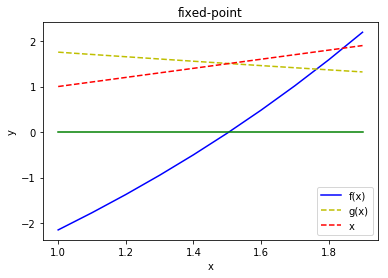

In [53]:
#Gráfica
a1 = 1
b1 = 2
paso = 0.1
x=numpy.arange(a1, b1, paso)
x1=numpy.arange(a1, b1, paso)


Y_F = [f(i) for i in x1]
Y_G = [g(i) for i in x]
Y_F1 = [f1(i) for i in x]
Y_0 = [zero(i) for i in x]

fig1=plt.figure()
axe=fig1.add_subplot(1,1,1)    
axe.plot(x1,Y_F,'b',label='f(x)')
axe.plot(x,Y_G, 'y', label='g(x)',  linestyle='--')
axe.plot(x,Y_F1, 'r', label='x',  linestyle='--')
axe.plot(x,Y_0, 'g')

axe.legend()
plt.ylabel("y")
plt.xlabel("x")
plt.title("fixed-point")
plt.show()

## Aplicación

Considere el siguiente movimiento:

![](https://www.fisimat.com.mx/wp-content/uploads/2017/11/tiro-parabolico-3.png)

Considere el siguiente movimiento. Con un rozamiento del viento de $b=0.01$ y una velocidad del viento de 40m/s, la función de movimiento $\Delta y(t)$ puede usarse para aproximar el tiempo de vuelo si se le resta una constante $F_D=30.9$
    
Utilizando el método de iteración de punto fijo, encuentre el tiempo de vuelo y el alcance del proyectil.

#### Solución

Sabiendo que: 
    
$\Delta y = v_{oy}t + \dfrac{1}{2}gt^2-F_D$

$v_o = 110 m/s$

$v_{oy} = v_o\sin(\theta)$ 

$v_{oy} = 63.09$

$g = -9.8m/s^2$

Tenemos:

$\Delta y = 63.09t - 4.9t^2-30.9$

El tiempo puede encontrarse al saber las raíces de la función para $\Delta y$, ya que es cuando toca el suelo.  

Por lo tanto:

$f(t) = 0$

$63.09t - 4.9t^2-30.9=0$

Aplicando el método:

$63.09t -30.9= 4.9t^2$

$t=\dfrac{63.09t -30.9}{4.9t}$

$t=\dfrac{63.09}{4.9}  - \dfrac{30.9}{4.9t}$

In [54]:
#Utilización del algoritmo

#Definimos nuestras funciones

def g(t):
    return 63.09/4.9-30.9/(4.9*t)

def f(t):
    return 63.09*t-4.9*t**2-30.9

In [55]:
print(fixed_point(f, g, 1, 0.0001))

(12.365533122826324, 6)


Respuesta en Wolfram Alpha: 12.3655

Alcance:

In [56]:
math.cos(35*math.pi/180)*110*fixed_point(f,g,1,0.0001)[0]

1114.2176909915067